## Import Libraries

In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

E:\Programs\anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read data

In [2]:
# Read in data from a CSV file and store it in a pandas DataFrame
data = pd.read_csv("yahoo_stock.csv")

In [3]:
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
# Extract date components
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

In [6]:
data['Year']

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
1820    2020
1821    2020
1822    2020
1823    2020
1824    2020
Name: Year, Length: 1825, dtype: int64

In [7]:
data

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day,DayOfWeek
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,2015,11,23,0
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,2015,11,24,1
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,2015,11,25,2
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,2015,11,26,3
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,2015,11,27,4
...,...,...,...,...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912,2020,11,16,0
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029,2020,11,17,1
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039,2020,11,18,2
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117,2020,11,19,3


In [8]:
# Retrieve the column names of the pandas DataFrame
data.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Year',
       'Month', 'Day', 'DayOfWeek'],
      dtype='object')

In [9]:
# Display the first 5 rows of the pandas DataFrame to preview the data
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day,DayOfWeek
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,2015,11,23,0
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,2015,11,24,1
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,2015,11,25,2
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,2015,11,26,3
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,2015,11,27,4


In [10]:
# Display the last 5 rows of the pandas DataFrame to preview the data
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day,DayOfWeek
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912,2020,11,16,0
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029,2020,11,17,1
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039,2020,11,18,2
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117,2020,11,19,3
1824,2020-11-20,3581.229980,3556.850098,3579.310059,3557.540039,2.236662e+09,3557.540039,2020,11,20,4


In [11]:
# some information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1825 non-null   datetime64[ns]
 1   High       1825 non-null   float64       
 2   Low        1825 non-null   float64       
 3   Open       1825 non-null   float64       
 4   Close      1825 non-null   float64       
 5   Volume     1825 non-null   float64       
 6   Adj Close  1825 non-null   float64       
 7   Year       1825 non-null   int64         
 8   Month      1825 non-null   int64         
 9   Day        1825 non-null   int64         
 10  DayOfWeek  1825 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 157.0 KB


In [12]:
# some statistical information about data
data.describe()

,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day,DayOfWeek
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284,2017.890959,6.516164,15.728767,2.997260
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177,1.447794,3.448857,8.807541,1.999861
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956,2015.000000,1.000000,1.000000,0.000000
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951,2017.000000,4.000000,8.000000,1.000000
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088,2018.000000,7.000000,16.000000,3.000000
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020,2019.000000,10.000000,23.000000,5.000000
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912,2020.000000,12.000000,31.000000,6.000000


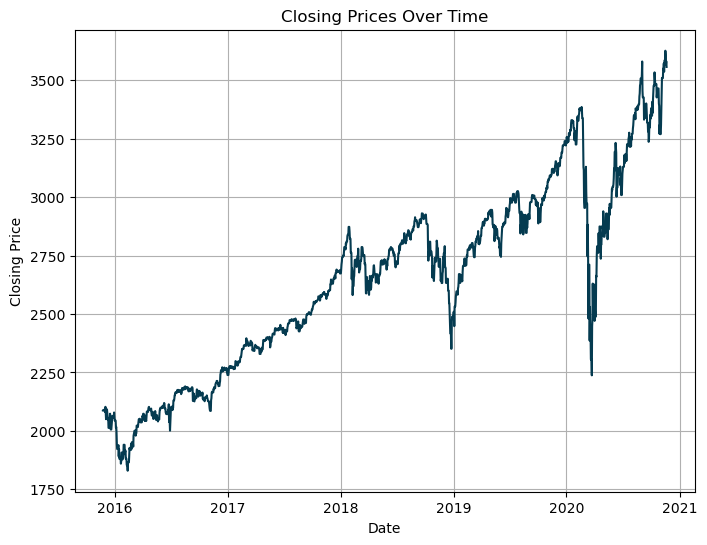

In [13]:
# Create a line chart

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Plot the 'Close' prices over time
plt.plot(data['Date'], data['Close'], label='Close', color='#053B50')

# Set the plot title
plt.title('Closing Prices Over Time')

# Label the x-axis as 'Date'
plt.xlabel('Date')

# Label the y-axis as 'Closing Price'
plt.ylabel('Closing Price')
plt.grid(True)

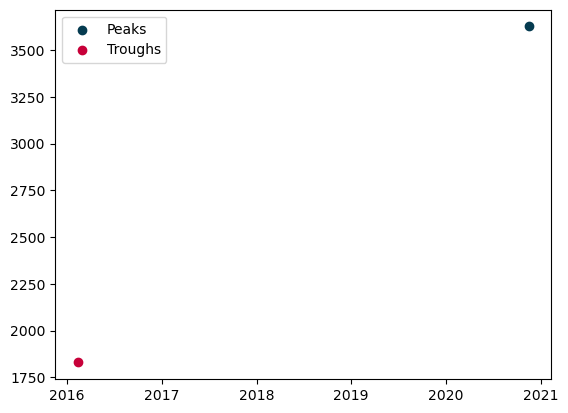

In [14]:
# Find and mark peaks (highest closing prices) and troughs (lowest closing prices)
peaks = data[data['Close'] == data['Close'].max()] # Find data points with the maximum 'Close' value (peaks)
troughs = data[data['Close'] == data['Close'].min()] # Find data points with the minimum 'Close' value (troughs)

plt.scatter(peaks['Date'], peaks['Close'], marker='o', color='#053B50', label='Peaks') # Mark peaks with green color
plt.scatter(troughs['Date'], troughs['Close'], marker='o', color='#C70039', label='Troughs') # Mark troughs with red color

# Display the plot with legend
plt.legend()

Text(0, 0.5, 'Adj Close')

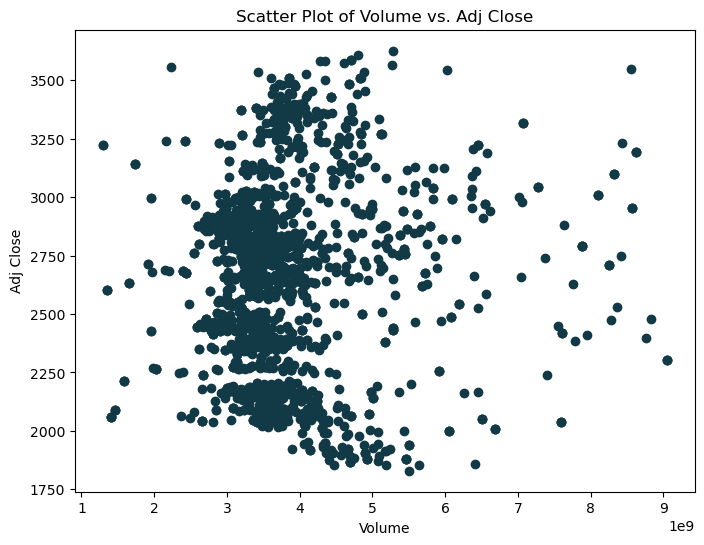

In [15]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Volume'], data['Adj Close'], marker='o', color='#113946') # Set the figure size
plt.title('Scatter Plot of Volume vs. Adj Close') # Create a scatter plot of 'Volume' vs. 'Adj Close'
plt.xlabel('Volume') # Label for the x-axis
plt.ylabel('Adj Close') # Label for the y-axis

Text(0, 0.5, 'Daily Return')

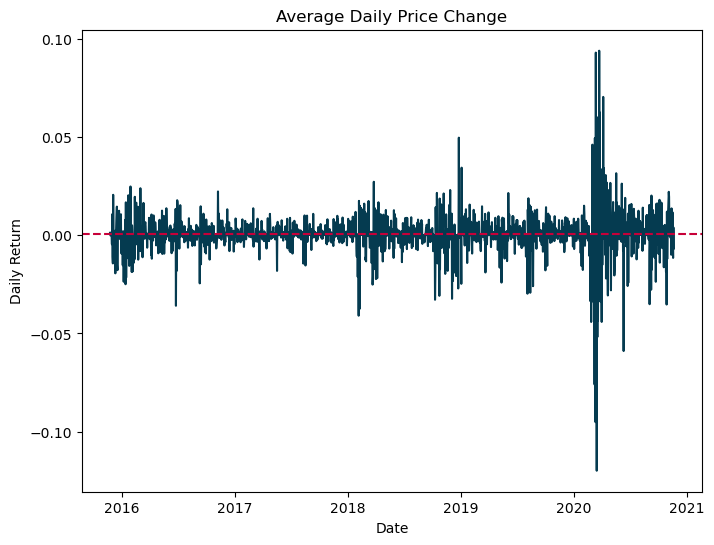

In [16]:
# Calculate the daily returns based on the 'Close' column
data['Daily_Return'] = data['Close'].pct_change()

# Calculate the mean of daily returns
average_daily_return = data['Daily_Return'].mean()

# Create a line chart to visualize daily returns
plt.figure(figsize=(8, 6)) # Set the figure size
plt.plot(data['Date'], data['Daily_Return'], label='Daily Returns', color='#053B50') # Plot the daily returns
plt.axhline(y=average_daily_return, color='#C70039', linestyle='--', label='Average Daily Return') # Add a horizontal line representing the average daily return
plt.title('Average Daily Price Change') # Set the title of the plot
plt.xlabel('Date') # Label for the x-axis 
plt.ylabel('Daily Return') # Label for the y-axis

## What does the line plot reveal about the trend in trading volume over the years?

Text(0, 0.5, 'Volume')

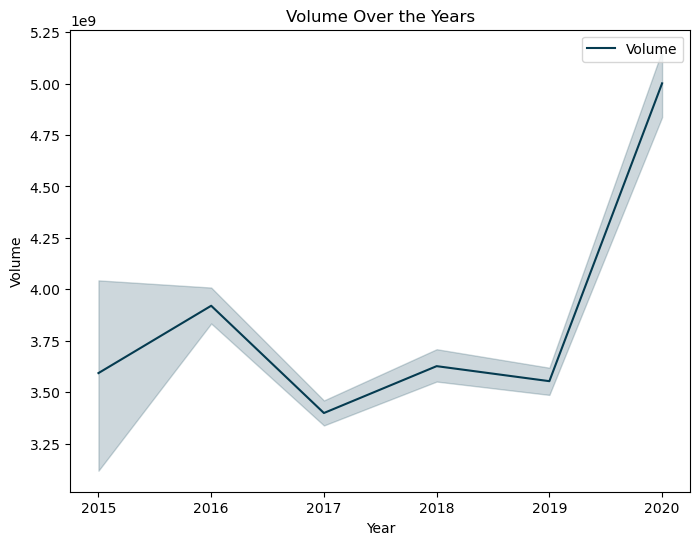

In [17]:
# Create the line plot using Seaborn
plt.figure(figsize=(8, 6)) # Set the figure size

# Create a line plot using Seaborn to visualize how the 'Volume' has changed over the years
sns.lineplot(data=data, x='Year', y='Volume', color='#053B50', label='Volume')

plt.title('Volume Over the Years')  # Set the title of the plot
plt.xlabel('Year') # Label for the x-axis
plt.ylabel('Volume') # Label for the y-axis

## What insights can be gained from the line plot about the historical trends in 'High' prices over the years?

Text(0, 0.5, 'High')

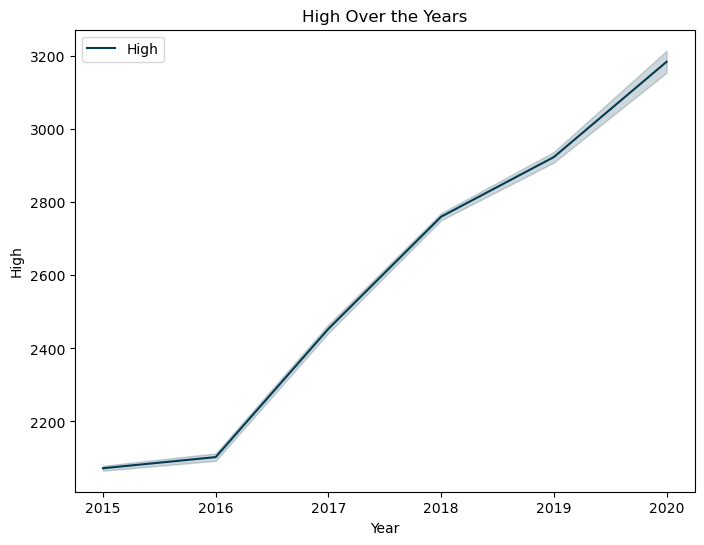

In [18]:
# Create the line plot using Seaborn to visualize the change in 'High' prices over the years
plt.figure(figsize=(8, 6)) # Set the figure size
sns.lineplot(data=data, x='Year', y='High', color='#053B50', label='High')
plt.title('High Over the Years') # Set the title of the plot
plt.xlabel('Year') # Label for the x-axis
plt.ylabel('High') # Label for the y-axis

## What insights can be derived from this line plot regarding the historical trends in 'Low' prices over the years?

Text(0, 0.5, 'Low')

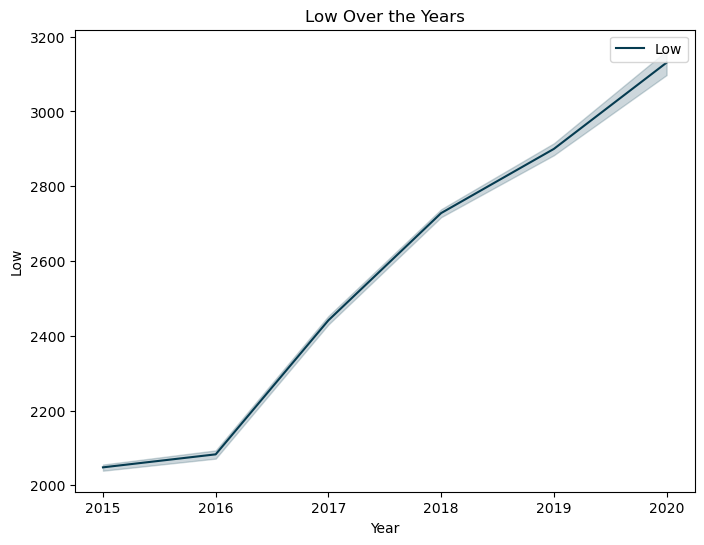

In [19]:
# Create a line plot using Seaborn to visualize the change in 'Low' prices over the years
plt.figure(figsize=(8, 6))  # Set the figure size
sns.lineplot(data=data, x='Year', y='Low', color='#053B50', label='Low')
plt.title('Low Over the Years')  # Set the title of the plot
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Low')  # Label for the y-axis

## How about the difference between 'High' and 'Low' prices over time?

Text(0, 0.5, 'Price Difference')

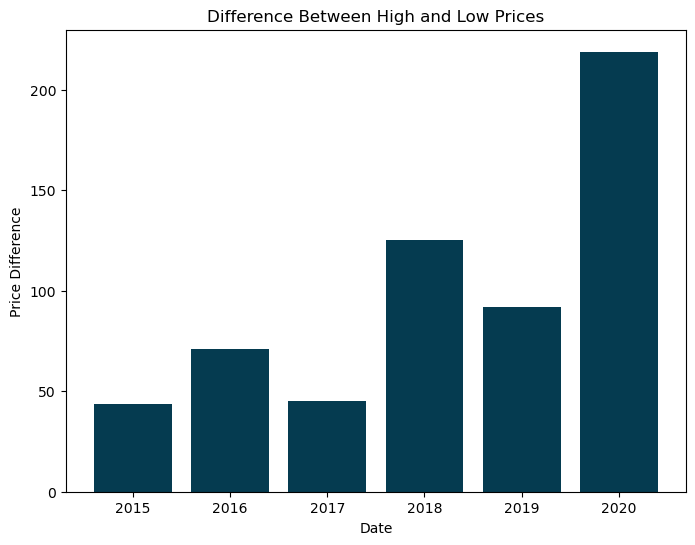

In [20]:
# Calculate the difference between 'High' and 'Low' prices
data['High_Low_Difference'] = data['High'] - data['Low']

# Create a bar plot to visualize the difference
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(data['Year'], data['High_Low_Difference'], color='#053B50')
plt.title('Difference Between High and Low Prices')  # Set the title of the plot
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Price Difference')  # Label for the y-axis

## Providing insights into how the price range fluctuates across different months.

Text(0, 0.5, 'Price Difference')

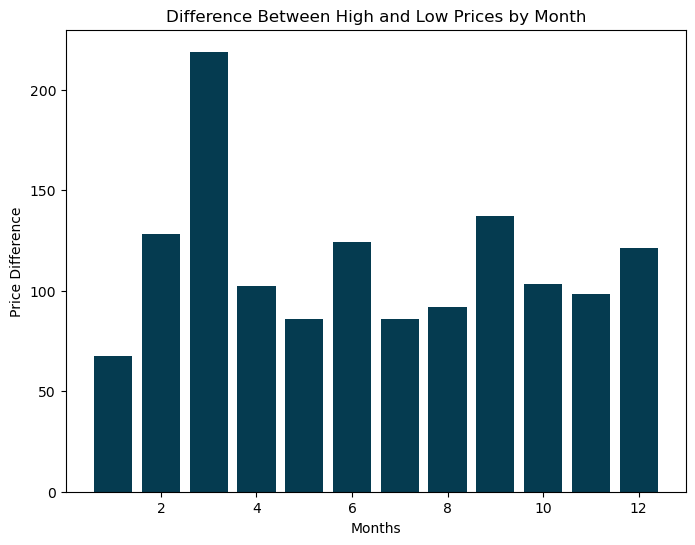

In [21]:
# Calculate the difference between 'High' and 'Low' prices for each data point
data['High_Low_Difference'] = data['High'] - data['Low']

# Create a bar plot to visualize the difference
plt.figure(figsize=(8, 6))
plt.bar(data['Month'], data['High_Low_Difference'], color='#053B50')
plt.title('Difference Between High and Low Prices by Month')
plt.xlabel('Months')
plt.ylabel('Price Difference')

## How does the 'Adj Close' price vary from year to year

Text(0, 0.5, 'Adj Close Price')

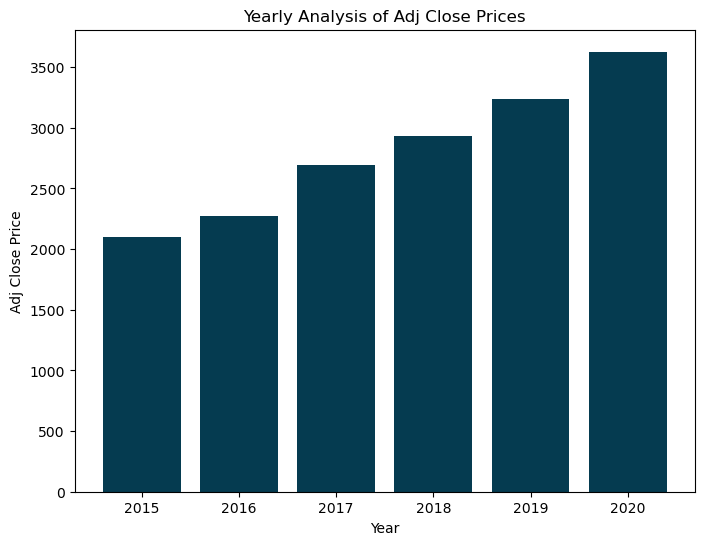

In [22]:
# Create a bar plot to visualize the relationship between 'Year' and 'Adj Close' prices
plt.figure(figsize=(8, 6))
plt.bar(data['Year'], data['Adj Close'], color='#053B50')
plt.title('Yearly Analysis of Adj Close Prices')
plt.xlabel('Year')
plt.ylabel('Adj Close Price')

## LSTM Model

In [23]:
# Choose the features you want to use for prediction
features = data[['High', 'Low', 'Open', 'Volume', 'Year', 'Month', 'Day', 'DayOfWeek', 'Adj Close']]

In [24]:
# Scale the features to the range [0, 1]
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [25]:
# Define the target variable (what you want to predict)
target = data['Close']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

In [27]:
# Reshape the data for the RNN model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [28]:
# Build an RNN model
model = keras.Sequential()
model.add(layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.Dense(1))

In [29]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1460/1460 - 4s - loss: 384199.5000 - 4s/epoch - 3ms/step
Epoch 2/100
1460/1460 - 3s - loss: 1252.7831 - 3s/epoch - 2ms/step
Epoch 3/100
1460/1460 - 3s - loss: 1870.3180 - 3s/epoch - 2ms/step
Epoch 4/100
1460/1460 - 3s - loss: 1782.0781 - 3s/epoch - 2ms/step
Epoch 5/100
1460/1460 - 3s - loss: 1830.1685 - 3s/epoch - 2ms/step
Epoch 6/100
1460/1460 - 3s - loss: 1862.1399 - 3s/epoch - 2ms/step
Epoch 7/100
1460/1460 - 3s - loss: 1852.8418 - 3s/epoch - 2ms/step
Epoch 8/100
1460/1460 - 3s - loss: 1390.7452 - 3s/epoch - 2ms/step
Epoch 9/100
1460/1460 - 3s - loss: 1536.5311 - 3s/epoch - 2ms/step
Epoch 10/100
1460/1460 - 3s - loss: 1324.6897 - 3s/epoch - 2ms/step
Epoch 11/100
1460/1460 - 3s - loss: 1164.9352 - 3s/epoch - 2ms/step
Epoch 12/100
1460/1460 - 3s - loss: 1192.7089 - 3s/epoch - 2ms/step
Epoch 13/100
1460/1460 - 3s - loss: 1367.2983 - 3s/epoch - 2ms/step
Epoch 14/100
1460/1460 - 3s - loss: 993.8068 - 3s/epoch - 2ms/step
Epoch 15/100
1460/1460 - 3s - loss: 1031.0081 - 3s/epoch

In [32]:
# Make predictions
y_pred = model.predict(X_test)

12/12 [==============================] - 1s 4ms/step


In [33]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 774.1737904217146


In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9895718631519115


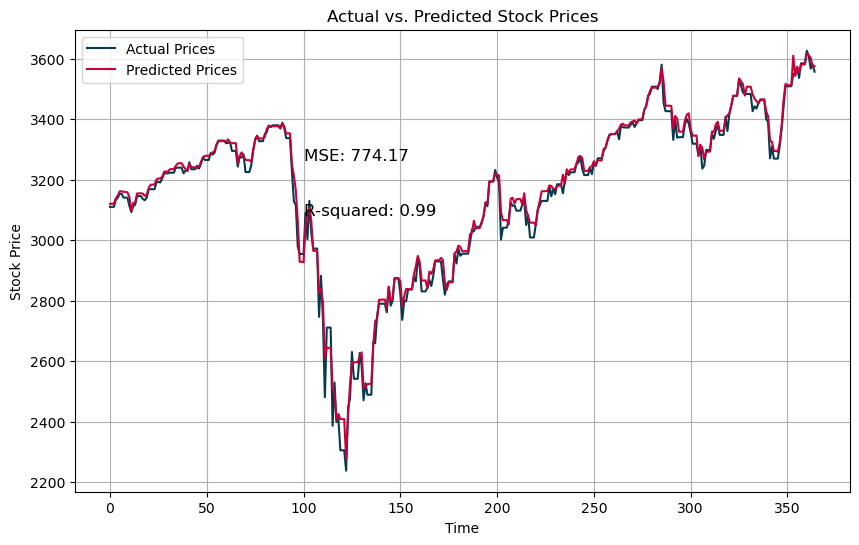

In [36]:
# Assuming you have actual stock prices in y_test and predicted prices in y_pred
y_test = np.array(y_test)  # Replace with your actual test data
y_pred = np.array(y_pred)  # Replace with your predicted data

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Create a line chart to visualize the actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual Prices", color="#053B50")
plt.plot(y_pred, label="Predicted Prices", color="#C70039")
plt.title("Actual vs. Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)

# Display the MSE and R2 as text in the plot
plt.text(100, max(y_test) * 0.9, f"MSE: {mse:.2f}", fontsize=12, color="black")
plt.text(100, max(y_test) * 0.85, f"R-squared: {r2:.2f}", fontsize=12, color="black")

# Show the plot
plt.show()

In [38]:
model.save("stock_price_prediction_model.h5")